In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customers/Churn Modeling.csv


In [80]:
#read the data 
df=pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")

In [81]:
#checking the data 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
#describing the data 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='Exited'>

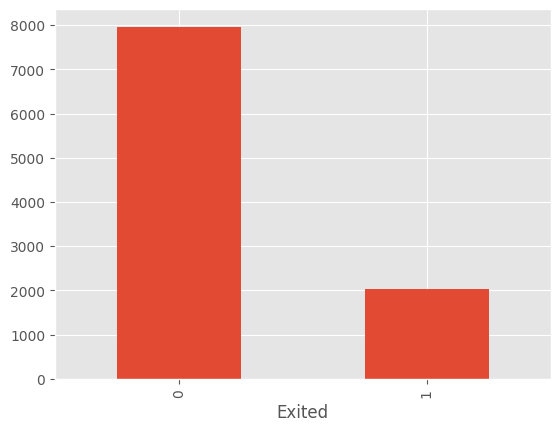

In [84]:
df.Exited.value_counts().plot.bar()

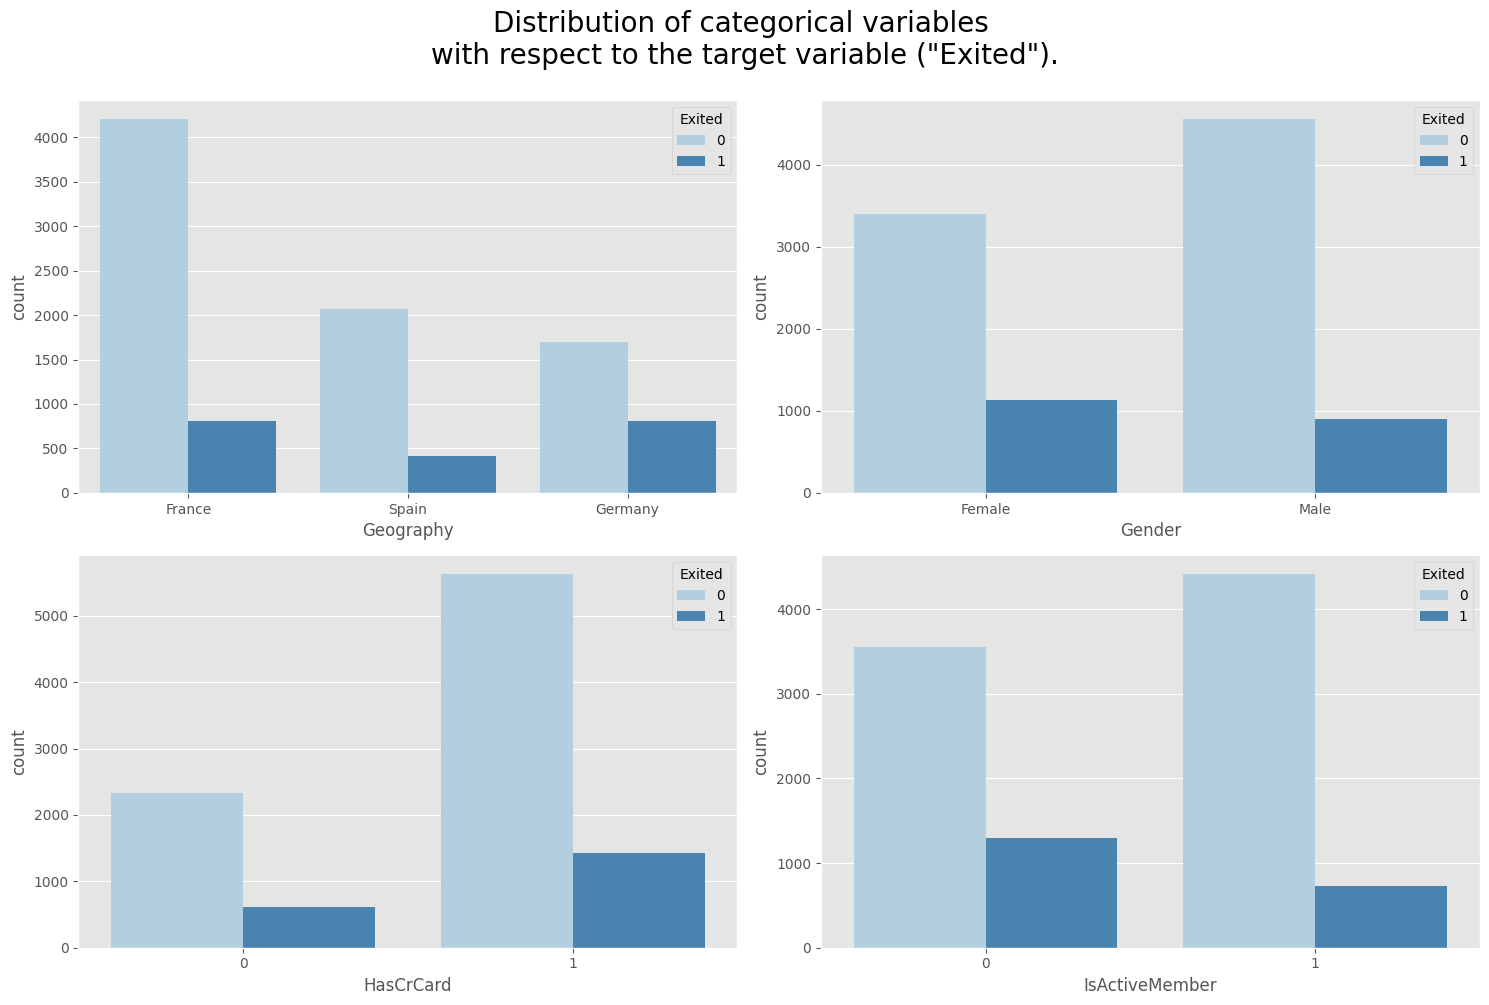

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


# Create subplots
sns.countplot(x="Geography", hue="Exited", data=df, ax=ax[0][0], palette='Blues')
sns.countplot(x="Gender", hue="Exited", data=df, ax=ax[0][1], palette='Blues')
sns.countplot(x="HasCrCard", hue="Exited", data=df, ax=ax[1][0], palette='Blues')
sns.countplot(x="IsActiveMember", hue="Exited", data=df, ax=ax[1][1], palette='Blues')

fig.suptitle('Distribution of categorical variables \nwith respect to the target variable ("Exited").', fontsize=20, y=1)

plt.tight_layout()
plt.show()


In [86]:
#checking null values 
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [87]:
#Converting categorical values into numerical values 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#convert categorical values to numreical and drop unneeded columnus for train Data 
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Geography']= label_encoder.fit_transform(df['Geography'])


In [88]:
#drop uneeded columns 
# Drop unnecessary columns in-place
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

In [89]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


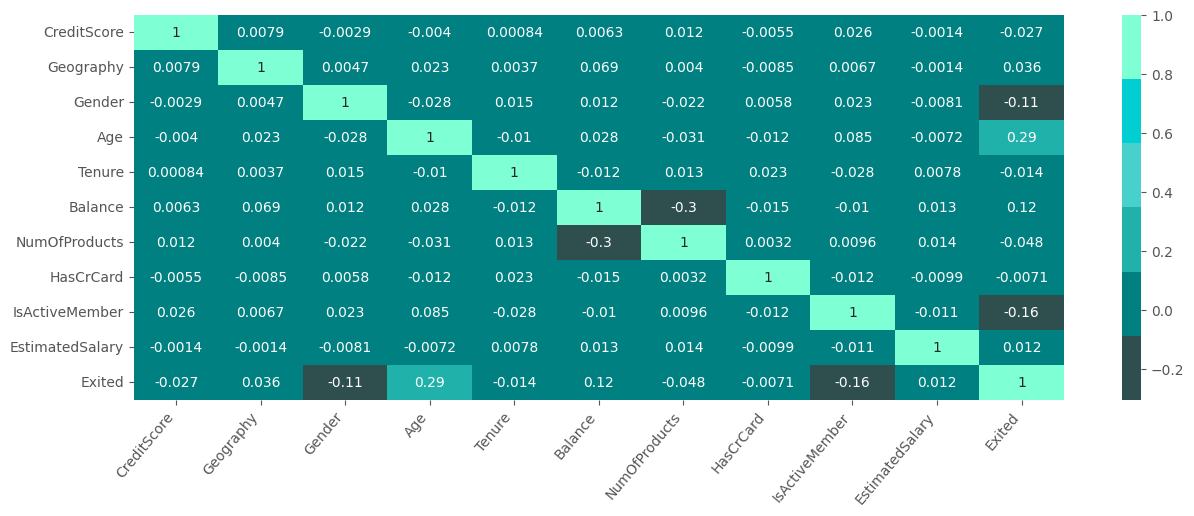

In [90]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), 
            cmap = ['#2F4F4F','#008080','#20B2AA','#48D1CC','#00CED1','#7FFFD4'], 
            annot=True)
plt.xticks(rotation=50, ha='right');

In [91]:
#splitting the data into train and test data 
from sklearn.model_selection import train_test_split
X = df.drop(['Exited'],axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating Models 

Accuracy: 0.8630
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



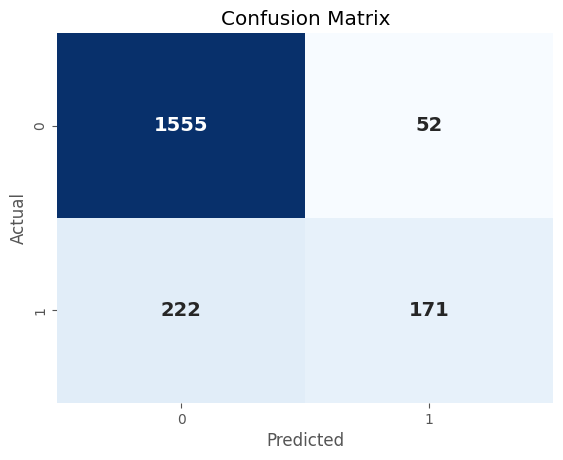

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#creating the model 
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot confusion matrix with colors using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8150
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



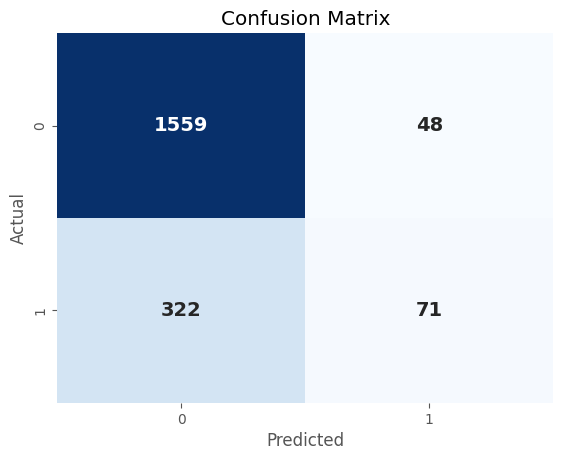

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



# Standardize the features (optional but often recommended for logistic regression)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot confusion matrix with colors using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
